# Importing required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
import nltk
import warnings
%matplotlib inline
from nltk.stem.porter import PorterStemmer
warnings.filterwarnings('ignore')

from nltk.corpus import stopwords

#nltk.download('stopwords')

In [2]:
df = pd.read_csv('train_E6oV3lV.csv')
df.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [3]:
print(df)

          id  label                                              tweet
0          1      0   @user when a father is dysfunctional and is s...
1          2      0  @user @user thanks for #lyft credit i can't us...
2          3      0                                bihday your majesty
3          4      0  #model   i love u take with u all the time in ...
4          5      0             factsguide: society now    #motivation
...      ...    ...                                                ...
31957  31958      0  ate @user isz that youuu?ðððððð...
31958  31959      0    to see nina turner on the airwaves trying to...
31959  31960      0  listening to sad songs on a monday morning otw...
31960  31961      1  @user #sikh #temple vandalised in in #calgary,...
31961  31962      0                   thank you @user for you follow  

[31962 rows x 3 columns]


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


In [5]:
df['tweet'][0]

' @user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction.   #run'

In [6]:
df['tweet'][1]

"@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx.    #disapointed #getthanked"

In [7]:
df['tweet'][2]

'  bihday your majesty'

In [8]:
df['tweet'][3]

'#model   i love u take with u all the time in urð\x9f\x93±!!! ð\x9f\x98\x99ð\x9f\x98\x8eð\x9f\x91\x84ð\x9f\x91\x85ð\x9f\x92¦ð\x9f\x92¦ð\x9f\x92¦  '

In [9]:
df['tweet'][4]

' factsguide: society now    #motivation'

In [10]:
df['tweet'][5]

'[2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo  '

# Preprocessing the data

In [11]:
STOPWORDS  = set(stopwords.words('english'))

def clean_text(text):
    
    # convert to lowercase
    text = text.lower()
    
    #remove @user
    text = re.sub("@[\w]*",' ',text)
    
    # remove special characters
    text = re.sub(r'[^0-9a-zA-Z#]', ' ', text)
    
    # remove extra spaces
    text = re.sub(r'\s+', ' ', text)
    
    #removing words that have less than 3 letters as they will be mostly useless
    text =  " ".join(word for word in text.split() if len(word)>2)
        
    # remove stopwords
    text = " ".join(word for word in text.split() if word not in STOPWORDS)
    
    #combining similar words into a single word
    stemmer = PorterStemmer()
    text=" ".join(stemmer.stem(word) for word in text.split())
    
    return text

In [12]:
df['clean_tweet']=df['tweet'].apply(clean_text)
df.head()

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,father dysfunct selfish drag kid dysfunct #run
1,2,0,@user @user thanks for #lyft credit i can't us...,thank #lyft credit use caus offer wheelchair v...
2,3,0,bihday your majesty,bihday majesti
3,4,0,#model i love u take with u all the time in ...,#model love take time
4,5,0,factsguide: society now #motivation,factsguid societi #motiv


In [13]:
df['clean_tweet'][1]

'thank #lyft credit use caus offer wheelchair van pdx #disapoint #getthank'

In [14]:
STOPWORDS

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [15]:
df['clean_tweet'].value_counts()

clean_tweet
#model love take time                                               325
final found way delet old tweet might find use well #deletetweet     83
aww yeah good bing bong bing bong                                    75
might libtard #libtard #sjw #liber #polit                            72
#grate #affirm                                                       57
                                                                   ... 
like deploy interf #genocid within #africa stop kill eac              1
mani appar wast gcse english lesson fact amp fiction                  1
appl iphon plu expect time india via #iphon #newlaunch                1
peopl especi noh india never learn                                    1
thank follow                                                          1
Name: count, Length: 28160, dtype: int64

# Visualizing the frequent words

In [16]:
#pip install wordcloud

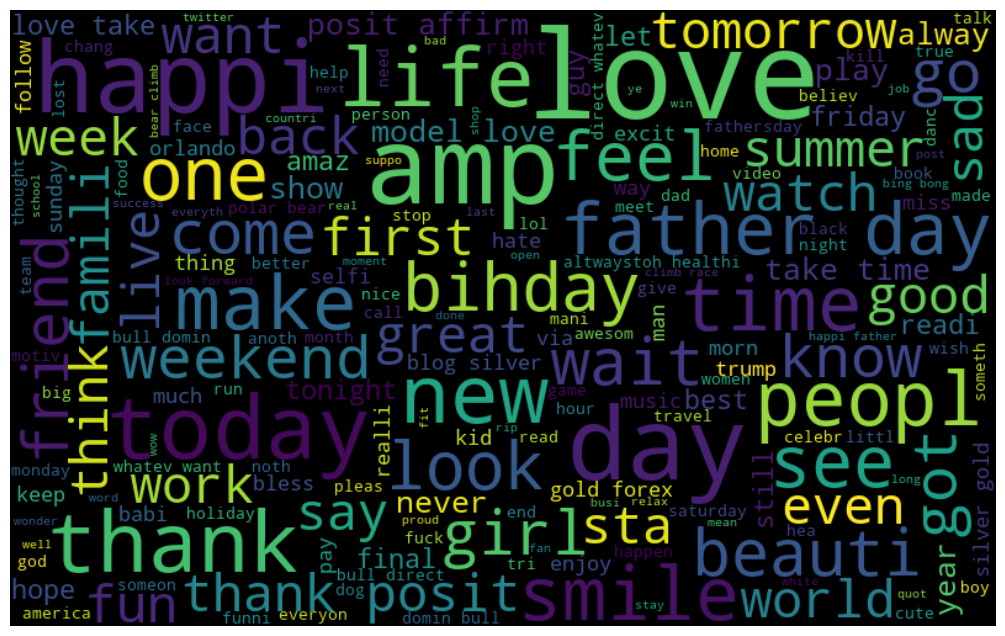

In [17]:
all_words = " ".join([sentence for sentence in df['clean_tweet']])

from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

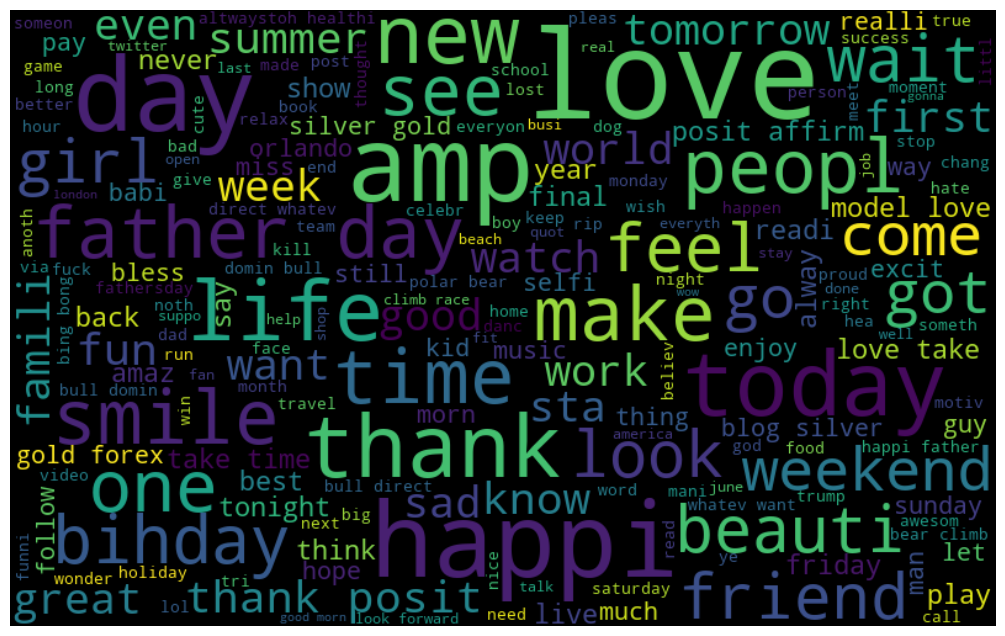

In [18]:
all_words = " ".join([sentence for sentence in df['clean_tweet'][df['label']==0]])

wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

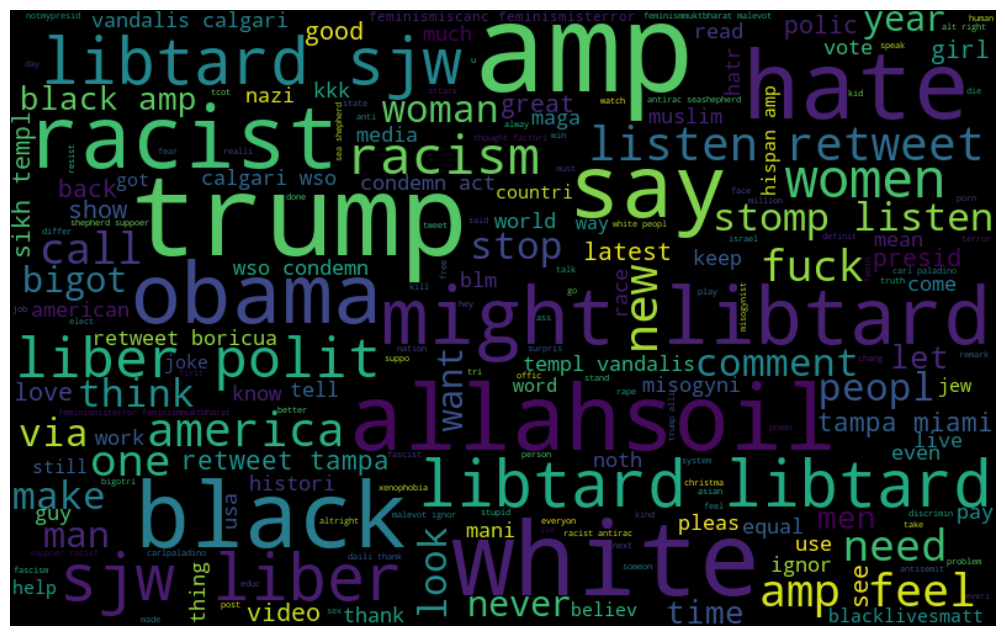

In [19]:
all_words = " ".join([sentence for sentence in df['clean_tweet'][df['label']==1]])

wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# Extracting hashtags

In [20]:
def hashtag_extract(tweets):
    hashtags = []
    for tweet in tweets:
        ht = re.findall(r"#(\w+)", tweet)
        hashtags.append(ht)
    return hashtags 

In [21]:
# extract hashtags from non-racist/sexist tweets
ht_positive = hashtag_extract(df['clean_tweet'][df['label']==0])

# extract hashtags from racist/sexist tweets
ht_negative = hashtag_extract(df['clean_tweet'][df['label']==1])

In [22]:
ht_positive[:5]

[['run'], ['lyft', 'disapoint', 'getthank'], [], ['model'], ['motiv']]

In [23]:
ht_positive = sum(ht_positive, [])
ht_negative = sum(ht_negative, [])

In [24]:
ht_positive[:5]

['run', 'lyft', 'disapoint', 'getthank', 'model']

In [25]:
freq = nltk.FreqDist(ht_positive)
d = pd.DataFrame({'Hashtag': list(freq.keys()),
                 'Count': list(freq.values())})
d.head()

,Hashtag,Count
0,run,72
1,lyft,2
2,disapoint,1
3,getthank,2
4,model,375


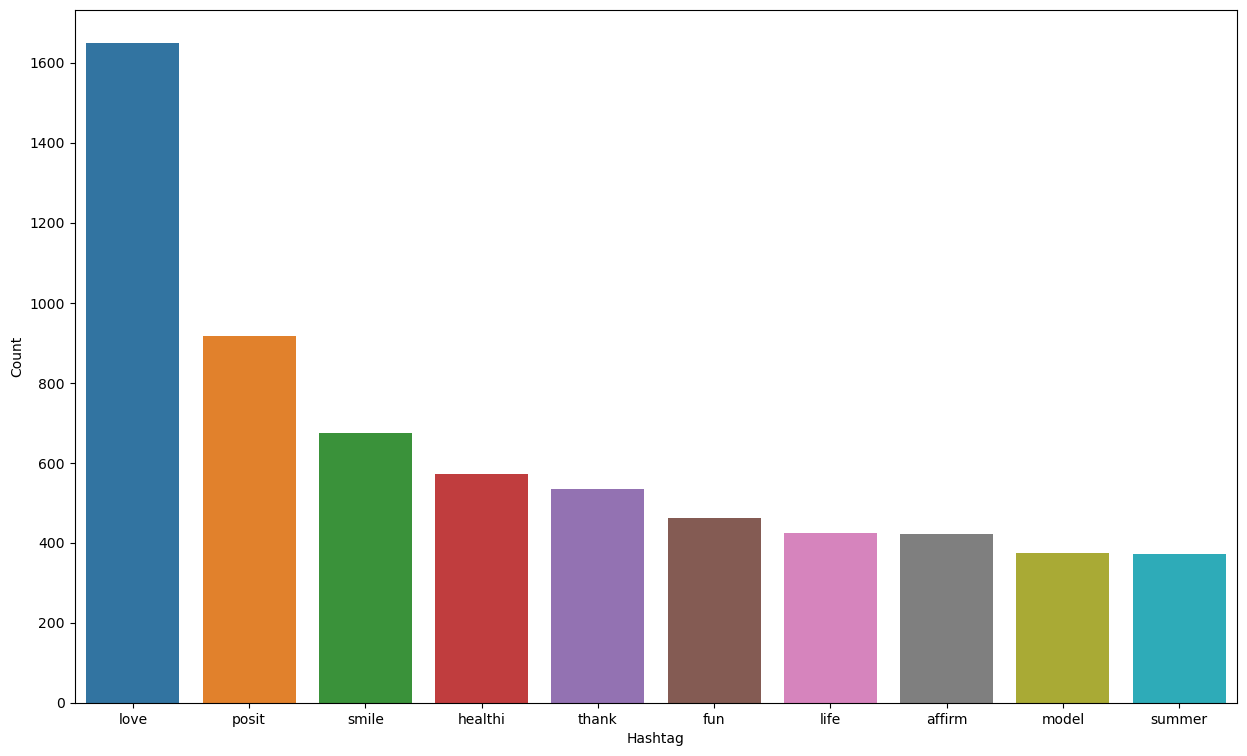

In [26]:
d = d.nlargest(columns='Count', n=10)
plt.figure(figsize=(15,9))
sns.barplot(data=d, x='Hashtag', y='Count')
plt.show()

In [27]:
freq = nltk.FreqDist(ht_negative)
d = pd.DataFrame({'Hashtag': list(freq.keys()),
                 'Count': list(freq.values())})
d.head()

,Hashtag,Count
0,cnn,10
1,michigan,2
2,tcot,14
3,australia,6
4,opkillingbay,5


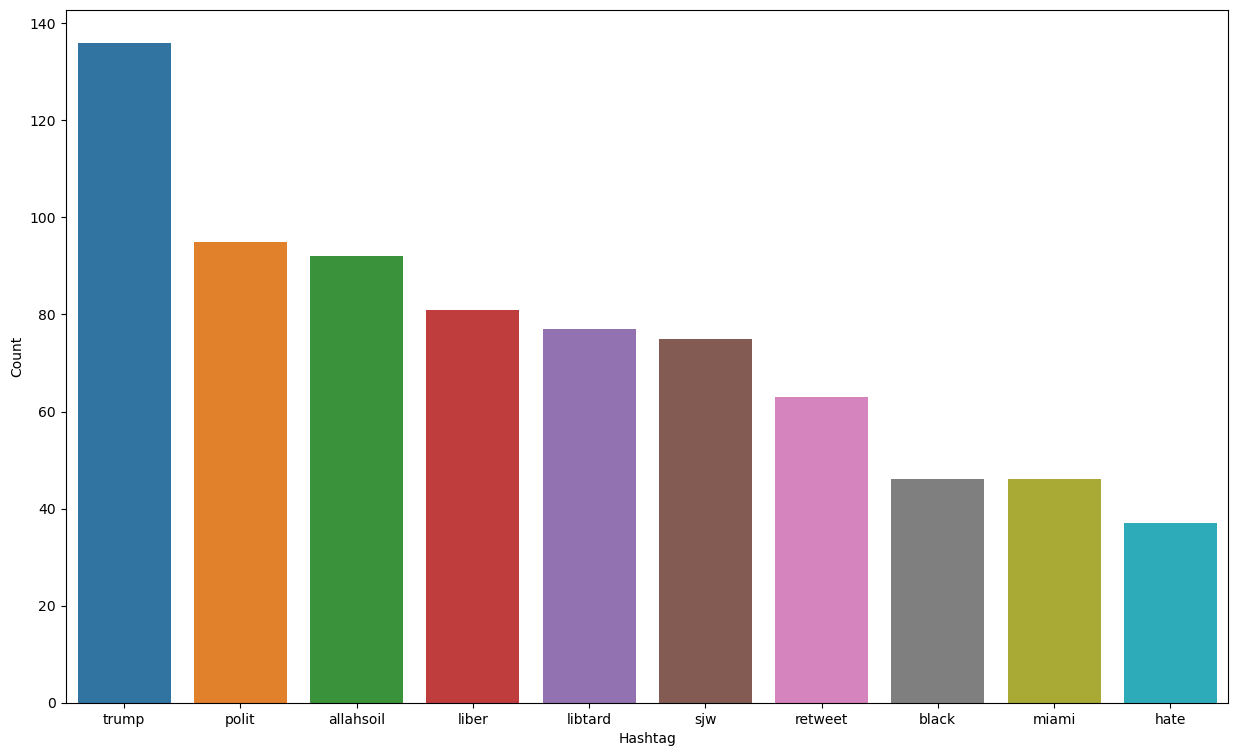

In [28]:
d = d.nlargest(columns='Count', n=10)
plt.figure(figsize=(15,9))
sns.barplot(data=d, x='Hashtag', y='Count')
plt.show()

# Feature extraction

In [29]:
from sklearn.feature_extraction.text import CountVectorizer

bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000)
bow = bow_vectorizer.fit_transform(df['clean_tweet'])

# Train test split

In [30]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(bow, df['label'], random_state=42, test_size=0.25)

# Logistic Regression

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [32]:
lr = LogisticRegression()
lr.fit(x_train,y_train)
predict= lr.predict(x_test)
accuracy = accuracy_score(y_test, predict)
accuracy

0.9491928419471906

# Decision Tree Classifier

In [33]:
from sklearn.tree import DecisionTreeClassifier

dt= DecisionTreeClassifier()
dt.fit(x_train,y_train)
predict= dt.predict(x_test)
accuracy = accuracy_score(y_test, predict)
accuracy

0.9235389813540232

# Random Forest Classifier

In [34]:
from sklearn.ensemble import RandomForestClassifier

rf= RandomForestClassifier()
rf.fit(x_train,y_train)
predict= rf.predict(x_test)
accuracy = accuracy_score(y_test, predict)
accuracy

0.943186084344888

# Multinomial Naive bayes

In [40]:
from sklearn.naive_bayes import MultinomialNB

mnb= MultinomialNB(alpha=20)
mnb.fit(x_train,y_train)
predict= mnb.predict(x_test)
accuracy = accuracy_score(y_test, predict)
accuracy

0.9389312977099237

# Support Vector Classifier

In [38]:
from sklearn.svm import SVC

svc = SVC(C=3)
svc.fit(x_train,y_train)
predict= svc.predict(x_test)
accuracy = accuracy_score(y_test, predict)
accuracy

0.9554498811162558

95% Accuracy is achieved in Support Vector Classifier(SVC)